# Harmony - Cloud Giovanni Integration
<b> Harmony: collection-based data transformation service<br>
Giovanni: variable-based data analysis service

![title](img/harmony-giovanni.png)

### Harmony-Giovanni URLs
![title](img/url.png)
#### Async:
https://harmony.uat.earthdata.nasa.gov/C1225808238-GES_DISC/ogc-api-coverages/1.0.0/collections/%2FGrid%2FIRprecipitation/coverage/rangeset?format=text%2Fcsv&point=91.6,25.3&subset=time%28%222010-01-01T00%3A00%3A00Z%22%3A%222014-12-31T23%3A59%3A59Z%22%29&forceAsync=true
#### Sync:
https://harmony.uat.earthdata.nasa.gov/C1225808238-GES_DISC/ogc-api-coverages/1.0.0/collections/%2FGrid%2FIRprecipitation/coverage/rangeset?format=text%2Fcsv&point=91.6,25.3&subset=time%28%222010-01-01T00%3A00%3A00Z%22%3A%222014-12-31T23%3A59%3A59Z%22%29

### Demo

In [1]:
import pandas as pd
import requests
import urllib.parse
import io
import matplotlib.pyplot as plt

In [2]:
def call_url(collection_id, variable_name, start_time,end_time,lat,lon):
    base_url = "https://harmony.uat.earthdata.nasa.gov/"\
                f"{collection_id}/"\
                "ogc-api-coverages/1.0.0/collections/"\
                f"{variable_name}/"\
                "coverage/rangeset"
    query_parameters = {
        "format": "text/csv",
        "point" : f"{lon},{lat}",
        "subset": f'time("{start_time}":"{end_time}")',
    }
    print(base_url)
    print(query_parameters)
    r = requests.get(base_url,params=query_parameters)
    print("DONE")
    if(r.status_code != 200):
        raise Exception("Unable to call harmony/giovanni")
    return r.text

def get_data_frame(start_time, end_time):
    
    collection_id = 'C1225808238-GES_DISC'
    variable_name = urllib.parse.quote_plus('/Grid/IRprecipitation')
    locations = {
        "Mawsynram, India": {
            "lat":25.3,
            "lon":91.6,
        },
        "Aoulef, Algeria": {
            "lat":27.0,
            "lon":1.0,
        }
    }
    
    rainy = call_url(collection_id, variable_name, start_time, end_time,
                     locations["Mawsynram, India"]["lat"], locations["Mawsynram, India"]["lon"])
    rainy_df = pd.read_csv(io.StringIO(rainy),
                 header=14, 
                 names=["Timestamp (UTC)","Precipitation in Mawsynram, India"],
                 parse_dates=[0],
                 index_col=0)
    
    desert = call_url(collection_id, variable_name, start_time, end_time,
                     locations["Aoulef, Algeria"]["lat"], locations["Aoulef, Algeria"]["lon"])
    desert_df = pd.read_csv(io.StringIO(desert),
                 header=14, 
                 names=["Timestamp (UTC)","Precipitation in Aoulef, Algeria"],
                 parse_dates=[0],
                 index_col=0)
    
    df = pd.concat([rainy_df,desert_df],axis=1,join="outer")
    
    return df

In [3]:
%%time
start_time = "2010-01-01T00:00:00Z"
end_time = "2014-12-31T23:59:59Z"
df = get_data_frame(start_time,end_time)
df

https://harmony.uat.earthdata.nasa.gov/C1225808238-GES_DISC/ogc-api-coverages/1.0.0/collections/%2FGrid%2FIRprecipitation/coverage/rangeset
{'format': 'text/csv', 'point': '91.6,25.3', 'subset': 'time("2010-01-01T00:00:00Z":"2014-12-31T23:59:59Z")'}
DONE
https://harmony.uat.earthdata.nasa.gov/C1225808238-GES_DISC/ogc-api-coverages/1.0.0/collections/%2FGrid%2FIRprecipitation/coverage/rangeset
{'format': 'text/csv', 'point': '1.0,27.0', 'subset': 'time("2010-01-01T00:00:00Z":"2014-12-31T23:59:59Z")'}
DONE
CPU times: user 331 ms, sys: 55.9 ms, total: 387 ms
Wall time: 40.2 s


Precipitation in Mawsynram, India  \
Timestamp (UTC)                                          
2010-01-01 00:00:00                                0.0   
2010-01-01 00:30:00                                0.0   
2010-01-01 01:00:00                                0.0   
2010-01-01 01:30:00                                0.0   
2010-01-01 02:00:00                                0.0   
...                                                ...   
2014-12-31 21:30:00                                0.0   
2014-12-31 22:00:00                                0.0   
2014-12-31 22:30:00                                0.0   
2014-12-31 23:00:00                                0.0   
2014-12-31 23:30:00                                0.0   

                     Precipitation in Aoulef, Algeria  
Timestamp (UTC)                                        
2010-01-01 00:00:00                               0.0  
2010-01-01 00:30:00                               0.0  
2010-01-01 01:00:00                               0.0  
2010-01-01 01:30:00                               0.0  
2010-01-01 02:00:00                               0.0  
...                                               ...  
2014-12-31 21:30:00                               0.0  
2014-12-31 22:00:00                               0.0  
2014-12-31 22:30:00                               0.0  
2014-12-31 23:00:00                               0.0  
2014-12-31 23:30:00                               0.0  

[87648 rows x 2 columns]

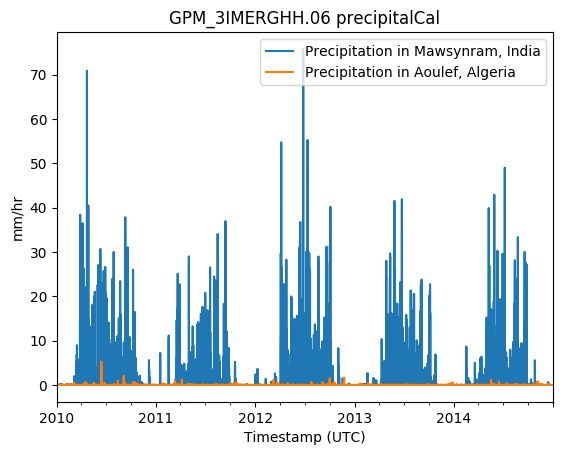

In [4]:
df.plot()
plt.ylabel('mm/hr')
plt.title("GPM_3IMERGHH.06 precipitalCal");
plt.show()